The data used for this project is downloaded from Kaggle and it is a sales data we are going to play with thus data and visualize various things to get valauble insights to improve future sales.

In [211]:
# improting necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings("ignore")

Step 1: Importing the data set and reading it

In [189]:
df = pd.read_csv('customer_details.csv')

Reading the head of data set to understand the data set 

In [190]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


Step 2- To see what columns are available in order do analysis 

In [192]:
# Print column names as a list
column_names = df.columns.tolist()
print("Column Names:")
print(column_names)

Column Names:
['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Payment Method', 'Frequency of Purchases']


Plot to depcit the purchase amount in respect to the gender

In [194]:
# Group by Category, Item Purchased, and Gender without summing the Frequency of Purchases
grouped = df.groupby(['Category', 'Item Purchased', 'Gender']).size().reset_index(name='Count')

# Find the maximum count for each category and gender
max_count = grouped.groupby(['Category', 'Gender'])['Count'].max().reset_index()

# Merge with the original DataFrame to get the most purchased item
result = pd.merge(max_count, grouped, on=['Category', 'Gender', 'Count'], how='left')

# Display the result
print(result)

      Category  Gender  Count Item Purchased
0  Accessories  Female     58        Handbag
1  Accessories    Male    119        Jewelry
2     Clothing  Female     66         Blouse
3     Clothing    Male    123          Pants
4     Footwear  Female     59        Sandals
5     Footwear    Male    103       Sneakers
6    Outerwear  Female     54         Jacket
7    Outerwear    Male    114           Coat


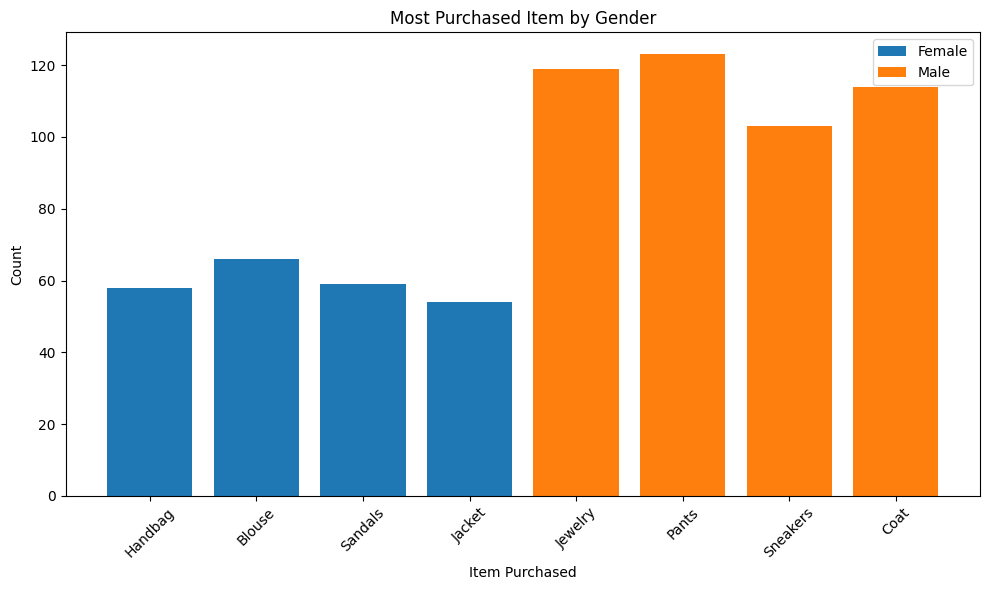

In [195]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Category, Item Purchased, and Gender without summing the Frequency of Purchases
grouped = df.groupby(['Category', 'Item Purchased', 'Gender']).size().reset_index(name='Count')

# Find the maximum count for each category and gender
max_count = grouped.groupby(['Category', 'Gender'])['Count'].max().reset_index()

# Merge with the original DataFrame to get the most purchased item
result = pd.merge(max_count, grouped, on=['Category', 'Gender', 'Count'], how='left')

# Create a bar chart
plt.figure(figsize=(10, 6))
for gender, group in result.groupby('Gender'):
    plt.bar(group['Item Purchased'], group['Count'], label=gender)

plt.xlabel('Item Purchased')
plt.ylabel('Count')
plt.title('Most Purchased Item by Gender')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
df = pd.read_csv('customer_details.csv')

To know which state has recorded the most no of purchases

In [196]:
# Group by 'Location' and count the number of purchases
location_counts = df.groupby('Location').size().reset_index(name='Number of Purchases')

# Find the state with the most purchases
most_purchases_state = location_counts.loc[location_counts['Number of Purchases'].idxmax()]

print("State with the most purchases:")
print(most_purchases_state)

State with the most purchases:
Location               Montana
Number of Purchases         96
Name: 25, dtype: object


To plot the No of purchses in resepct to the location

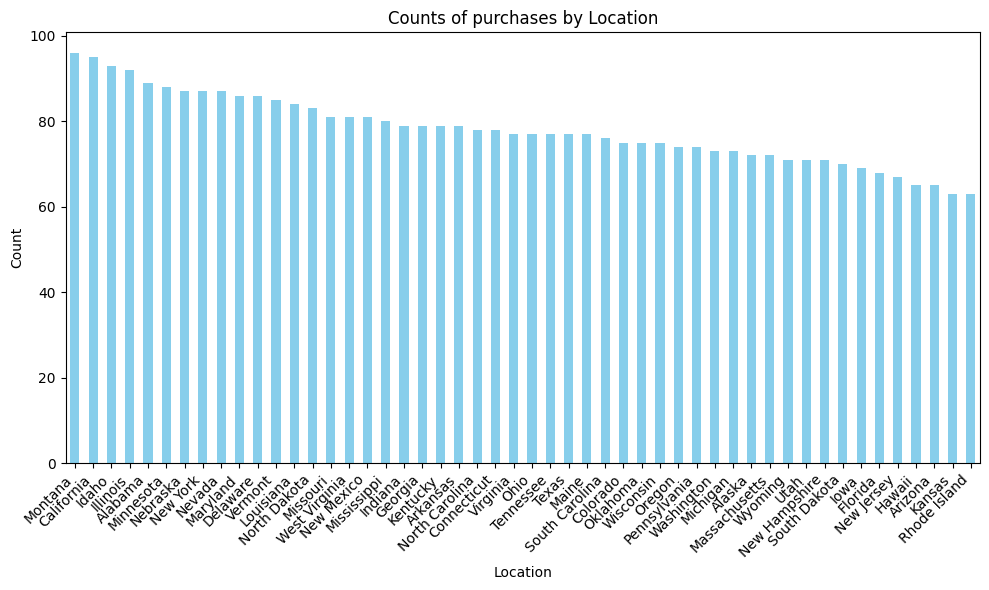

In [213]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
location_counts = df['Location'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Counts of purchases by Location')

# Rotating x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

To tabulate the locations in desceding order based on the total amount purchased in USD 

In [198]:
# Group by 'Location' and sum the 'Purchase Amount (USD)'
location_sums = df.groupby('Location')['Purchase Amount (USD)'].sum().reset_index()
location_sums.columns = ['Location', 'Total Purchase Amount (USD)']

# Sort by 'Total Purchase Amount (USD)' in descending order
location_sums_sorted = location_sums.sort_values(by='Total Purchase Amount (USD)', ascending=False)

print("Total Purchase Amount (USD) by Location (Descending Order):")
print(location_sums_sorted)

Total Purchase Amount (USD) by Location (Descending Order):
          Location  Total Purchase Amount (USD)
25         Montana                         5784
12        Illinois                         5617
4       California                         5605
11           Idaho                         5587
27          Nevada                         5514
0          Alabama                         5261
31        New York                         5257
33    North Dakota                         5220
47   West Virginia                         5174
26        Nebraska                         5172
30      New Mexico                         5014
22       Minnesota                         4977
37    Pennsylvania                         4926
23     Mississippi                         4883
1           Alaska                         4867
44         Vermont                         4860
17       Louisiana                         4848
45        Virginia                         4842
3         Arkansas          

To plot the total amount purchased in USD with respect to the location

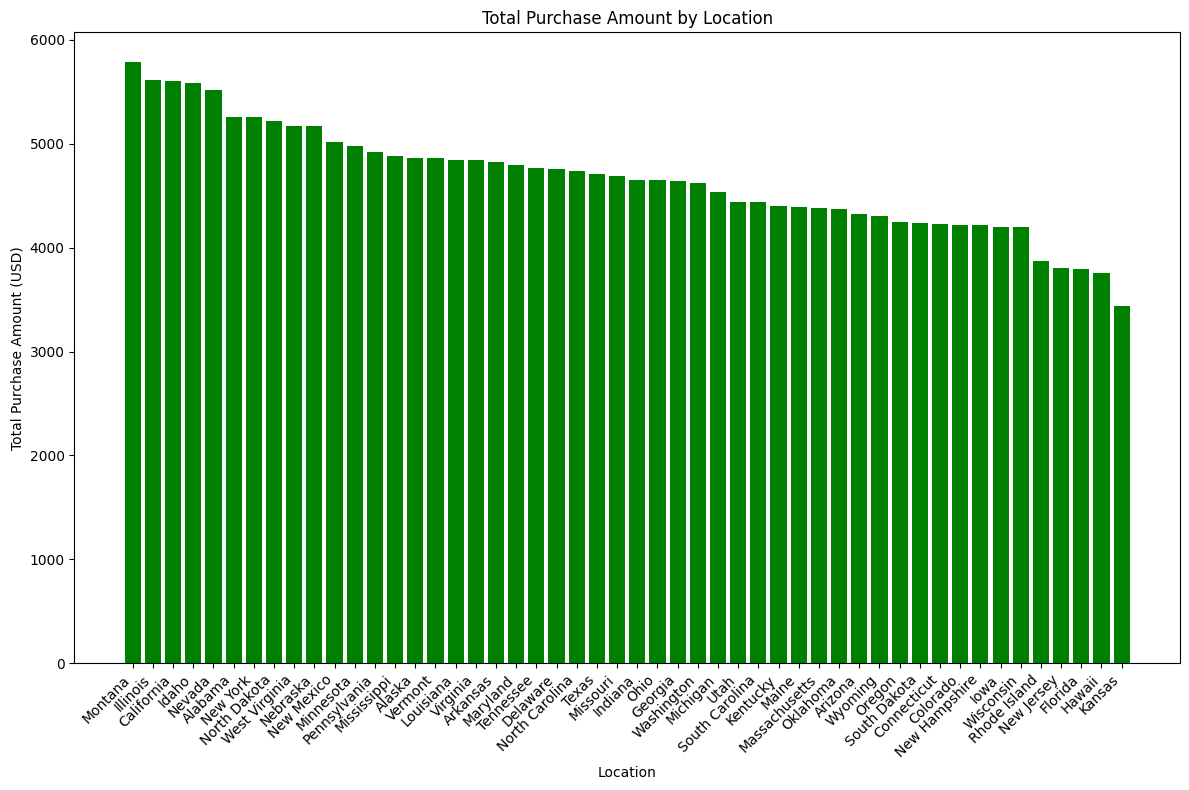

In [216]:
import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(location_sums_sorted['Location'], location_sums_sorted['Total Purchase Amount (USD)'], color='green')

# Adding labels and title
plt.xlabel('Location')
plt.ylabel('Total Purchase Amount (USD)')
plt.title('Total Purchase Amount by Location')

# Rotating x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [218]:
df.groupby('Location')

To count the shipping type occurences based on location

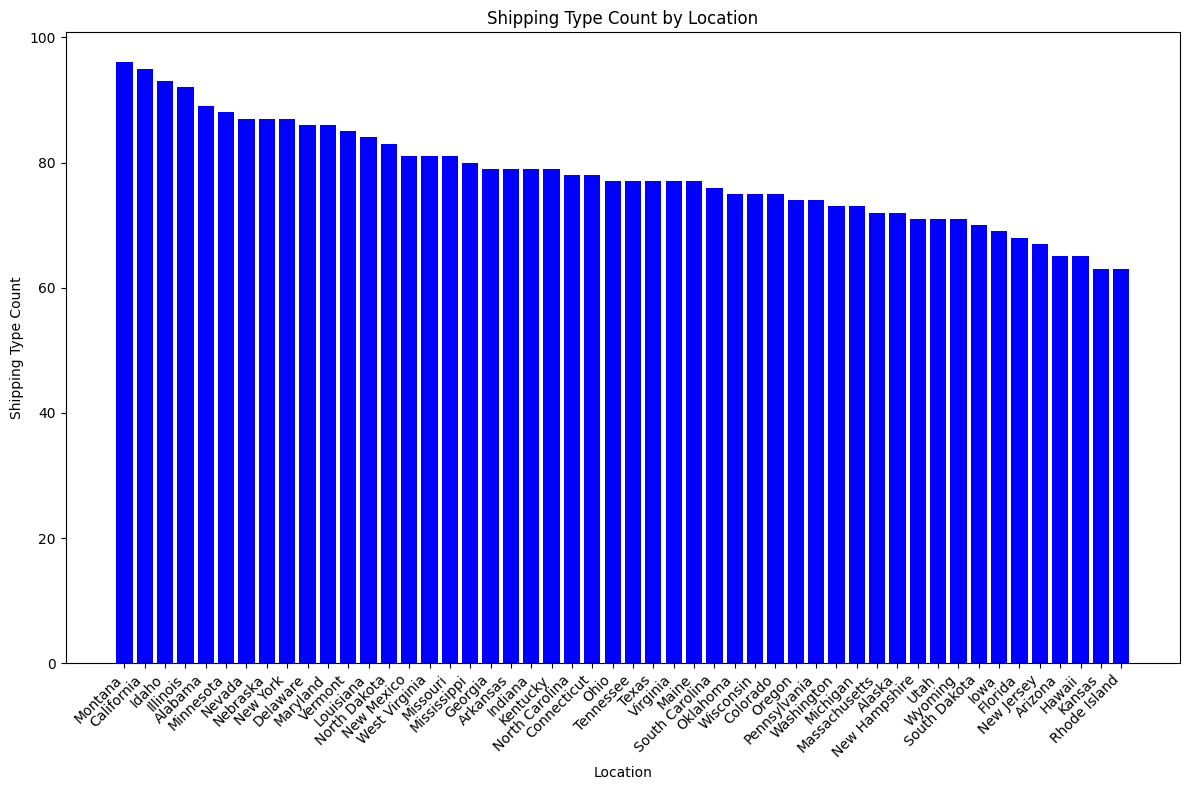

In [226]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame 'df' is already loaded

# Group by 'Location' and count the 'Shipping Type'
shipping_type_count = df.groupby('Location')['Shipping Type'].count().reset_index()
shipping_type_count.columns = ['Location', 'Shipping Type Count']

# Sort by 'Shipping Type Count' in descending order for better visualization
shipping_type_count_sorted = shipping_type_count.sort_values(by='Shipping Type Count', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(shipping_type_count_sorted['Location'], shipping_type_count_sorted['Shipping Type Count'], color='blue')

# Adding labels and title
plt.xlabel('Location')
plt.ylabel('Shipping Type Count')
plt.title('Shipping Type Count by Location')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


To reflect the type of shiiping used and its occurence in each state

In [221]:
# Group by 'Location' and 'Shipping Type', count occurrences, and reset index
shipping_type_count = df.groupby(['Location', 'Shipping Type']).size().reset_index(name='Count')

print("Shipping Type Count for Each Location:")
print(shipping_type_count)

Shipping Type Count for Each Location:
           Location   Shipping Type  Count
0           Alabama  2-Day Shipping     16
1           Alabama         Express     20
2           Alabama   Free Shipping      9
3           Alabama    Next Day Air     17
4           Alabama        Standard      8
5           Alabama    Store Pickup     19
6            Alaska  2-Day Shipping     13
7            Alaska         Express     13
8            Alaska   Free Shipping     14
9            Alaska    Next Day Air      8
10           Alaska        Standard     17
11           Alaska    Store Pickup      7
12          Arizona  2-Day Shipping     10
13          Arizona         Express     12
14          Arizona   Free Shipping     10
15          Arizona    Next Day Air     11
16          Arizona        Standard     10
17          Arizona    Store Pickup     12
18         Arkansas  2-Day Shipping     12
19         Arkansas         Express     16
20         Arkansas   Free Shipping     14
21         Arka

In [ ]:
Reflection of the shipping types in each state visually to find out which was the highest and lowest mode of shipping type used

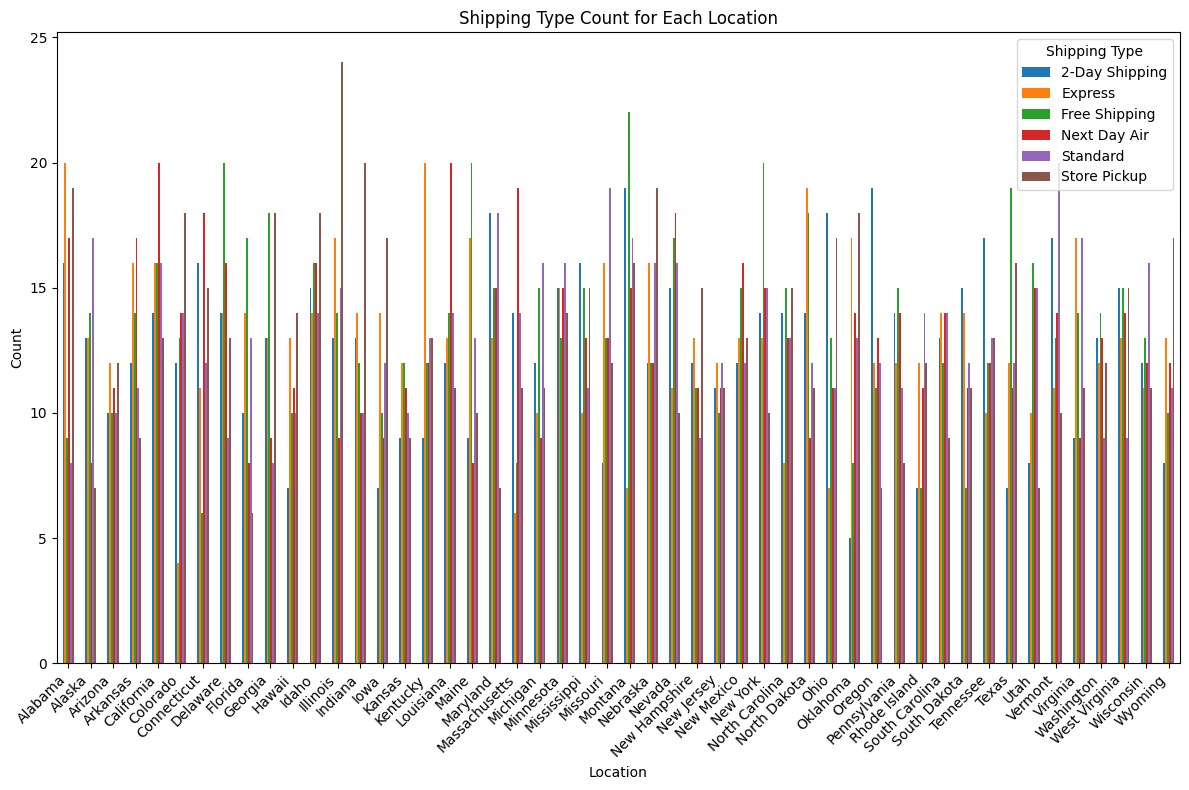

In [227]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame 'df' is already loaded

# Group by 'Location' and 'Shipping Type', count occurrences, and reset index
shipping_type_count = df.groupby(['Location', 'Shipping Type']).size().reset_index(name='Count')

# Pivot the data for easier plotting
pivot_data = shipping_type_count.pivot(index='Location', columns='Shipping Type', values='Count').fillna(0)

# Plotting the grouped bar chart
pivot_data.plot(kind='bar', figsize=(12, 8))

# Adding labels and title
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Shipping Type Count for Each Location')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.legend(title='Shipping Type')
plt.tight_layout()
plt.show()


To assist with better visibility and to get insightful results , each graph depicts the data of 10 states

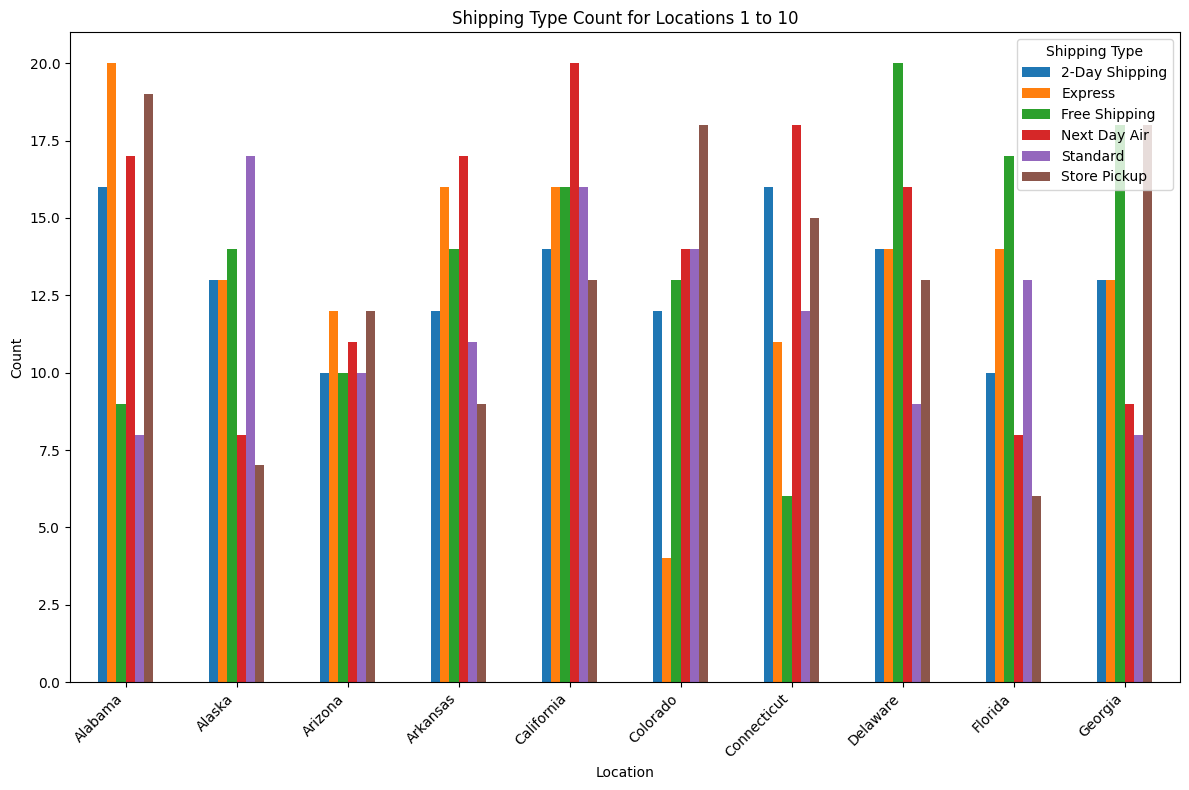

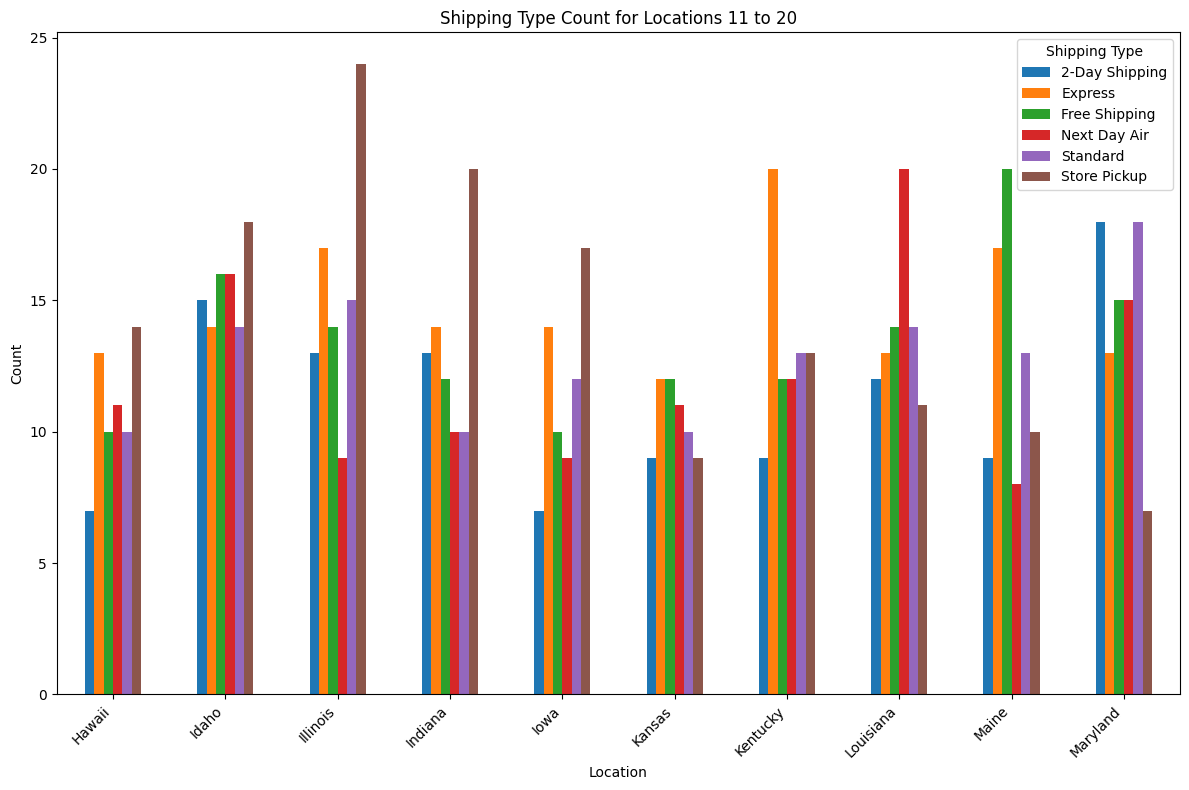

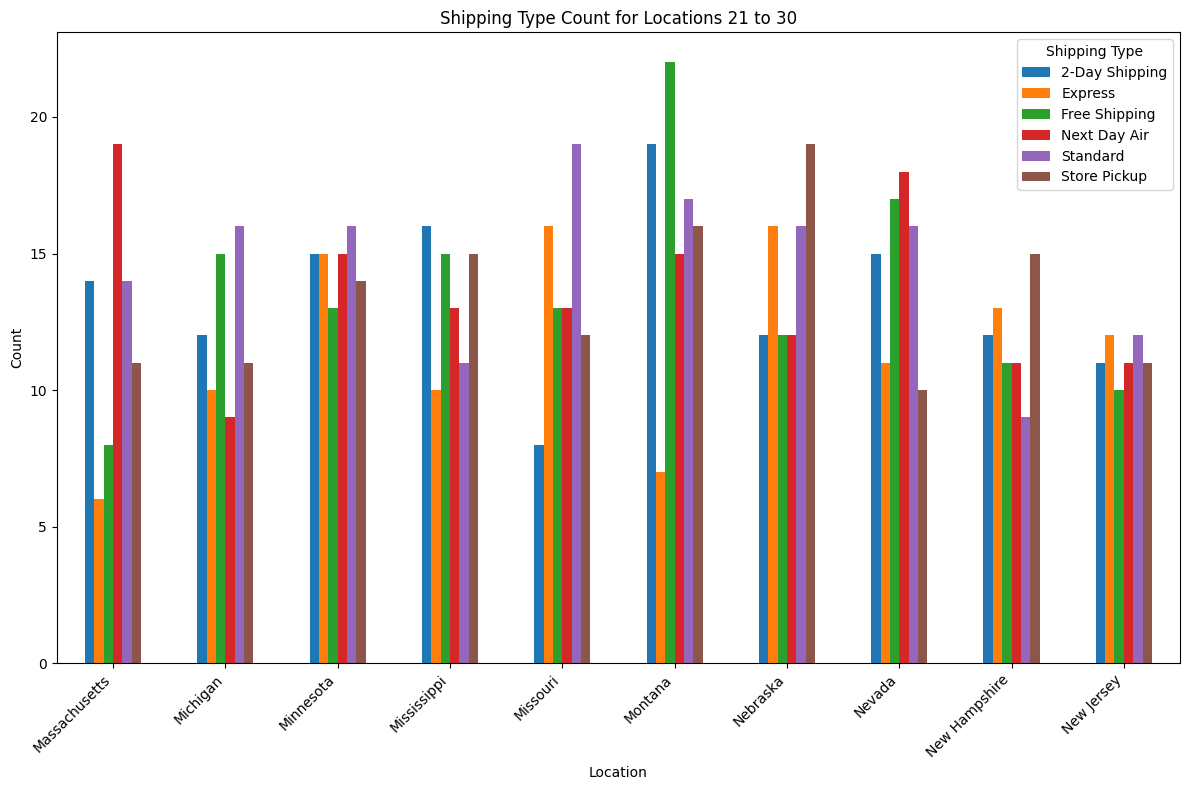

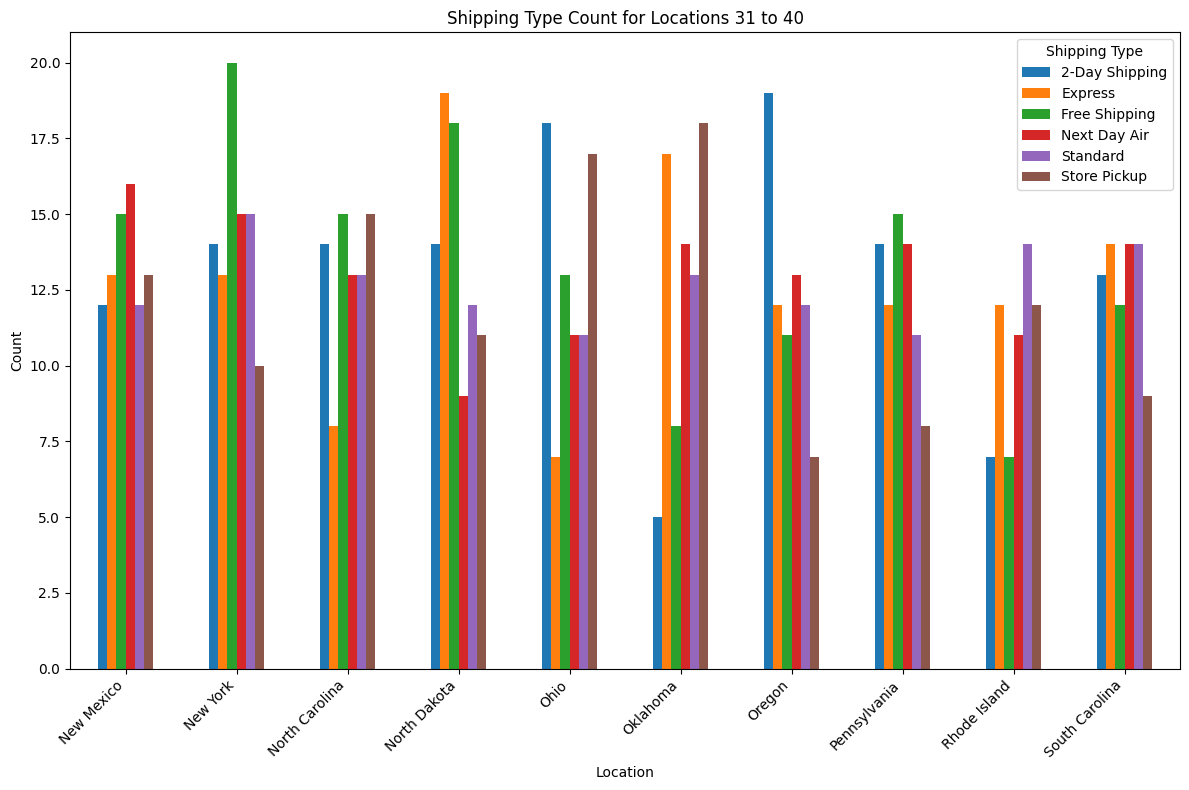

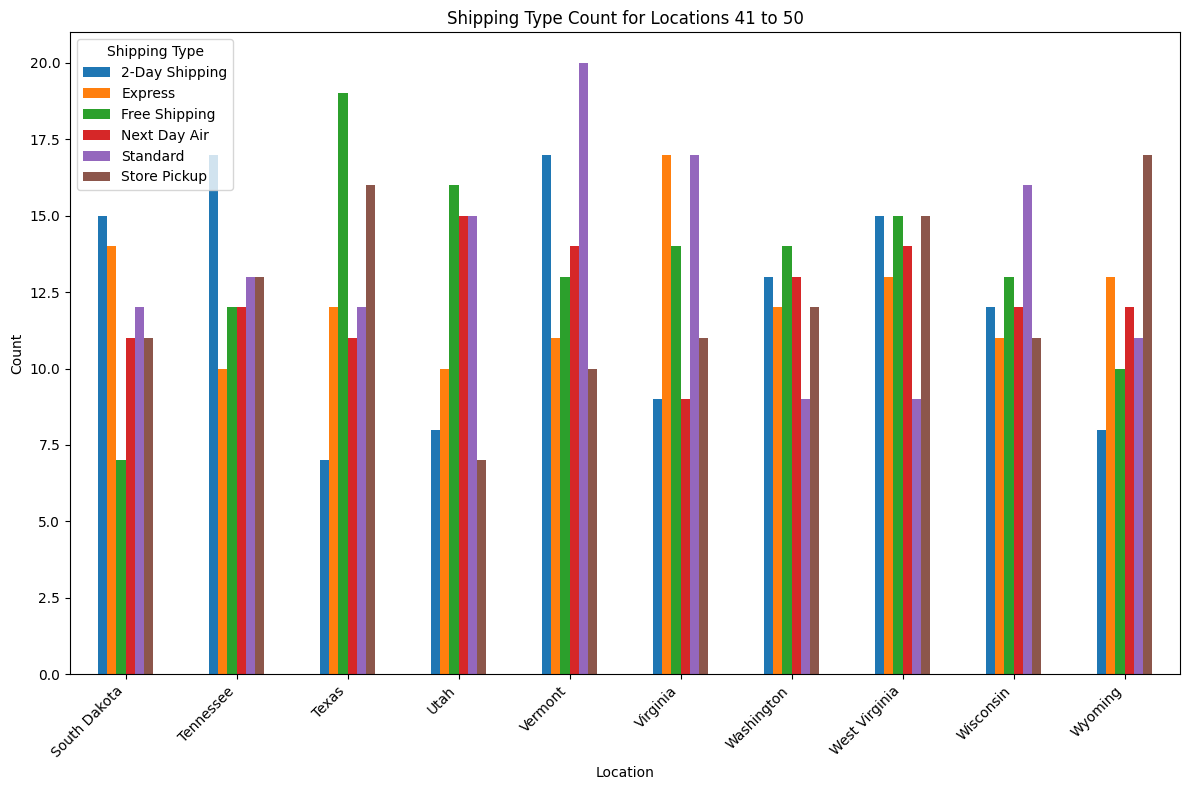

In [228]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame 'df' is already loaded

# Group by 'Location' and 'Shipping Type', count occurrences, and reset index
shipping_type_count = df.groupby(['Location', 'Shipping Type']).size().reset_index(name='Count')

# Pivot the data for easier plotting
pivot_data = shipping_type_count.pivot(index='Location', columns='Shipping Type', values='Count').fillna(0)

# Sort the locations alphabetically for consistent chunking
pivot_data = pivot_data.sort_index()

# Define the number of charts and locations per chart
num_charts = 5
locations_per_chart = 10

# Create the charts
for i in range(num_charts):
    start_idx = i * locations_per_chart
    end_idx = start_idx + locations_per_chart
    pivot_data_chunk = pivot_data.iloc[start_idx:end_idx]

    # Plotting the grouped bar chart for the chunk
    ax = pivot_data_chunk.plot(kind='bar', figsize=(12, 8))

    # Adding labels and title
    plt.xlabel('Location')
    plt.ylabel('Count')
    plt.title(f'Shipping Type Count for Locations {start_idx + 1} to {end_idx}')

    # Rotating x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    plt.legend(title='Shipping Type')
    plt.tight_layout()
    plt.show()


To plot the Shipping type with highest and lowest count in each locations

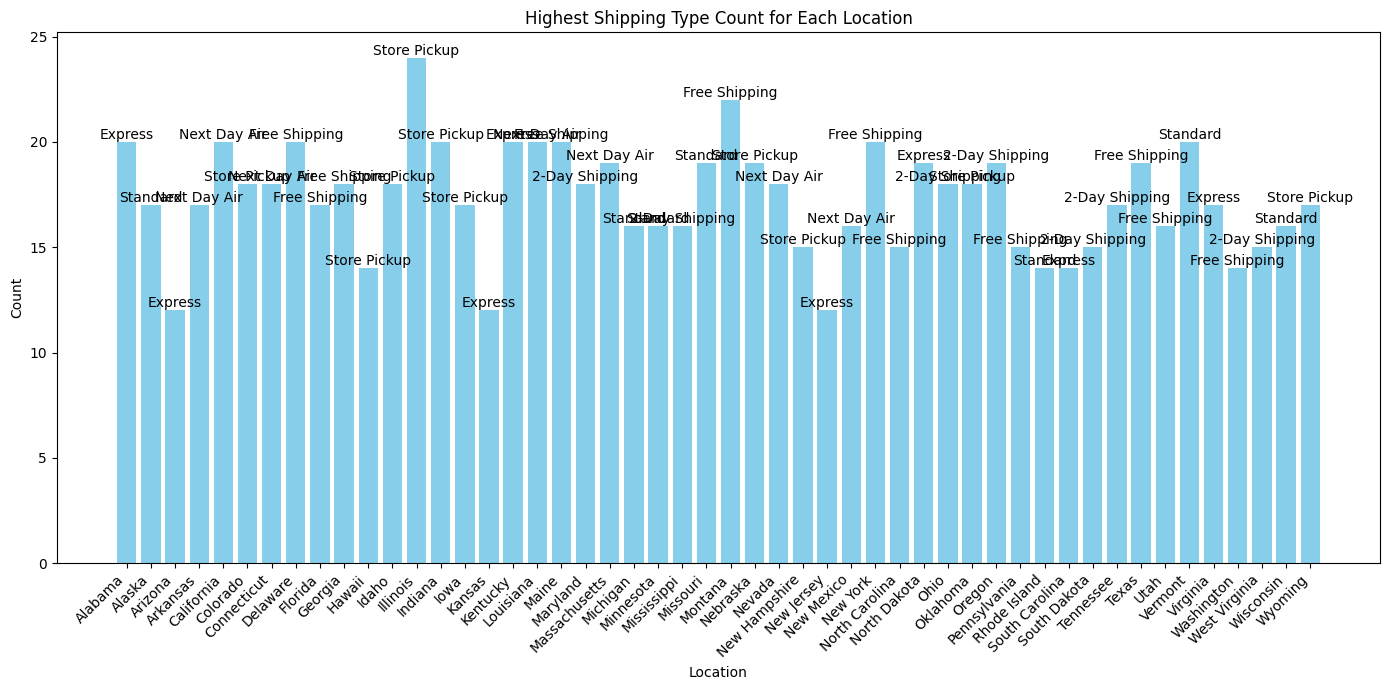

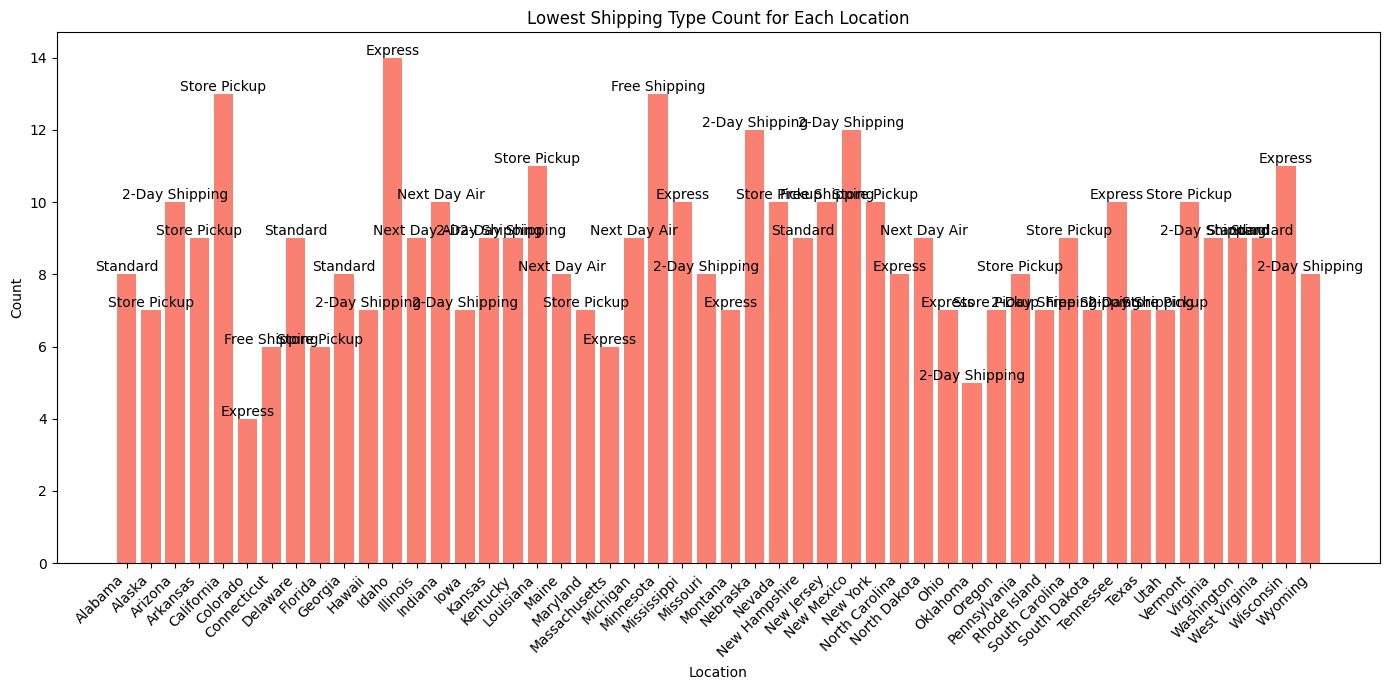

In [237]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame 'df' is already loaded

# Group by 'Location' and 'Shipping Type', count occurrences, and reset index
shipping_type_count = df.groupby(['Location', 'Shipping Type']).size().reset_index(name='Count')

# Find the highest and lowest 'Shipping Type' count for each location
highest_shipping_type = shipping_type_count.loc[shipping_type_count.groupby('Location')['Count'].idxmax()]
lowest_shipping_type = shipping_type_count.loc[shipping_type_count.groupby('Location')['Count'].idxmin()]

# Plotting the highest shipping type count bar plot
plt.figure(figsize=(14, 7))
bars = plt.bar(highest_shipping_type['Location'], highest_shipping_type['Count'], color='skyblue')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Highest Shipping Type Count for Each Location')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotating bars with 'Shipping Type' names
for bar, label in zip(bars, highest_shipping_type['Shipping Type']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom')

plt.show()

# Plotting the lowest shipping type count bar plot
plt.figure(figsize=(14, 7))
bars = plt.bar(lowest_shipping_type['Location'], lowest_shipping_type['Count'], color='salmon')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Lowest Shipping Type Count for Each Location')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotating bars with 'Shipping Type' names
for bar, label in zip(bars, lowest_shipping_type['Shipping Type']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom')

plt.show()

To visualize the payment methods and counts for various locations

In [89]:
payment_grouped1 = df.groupby(['Location', 'Payment Method']).size().reset_index(name='Count')

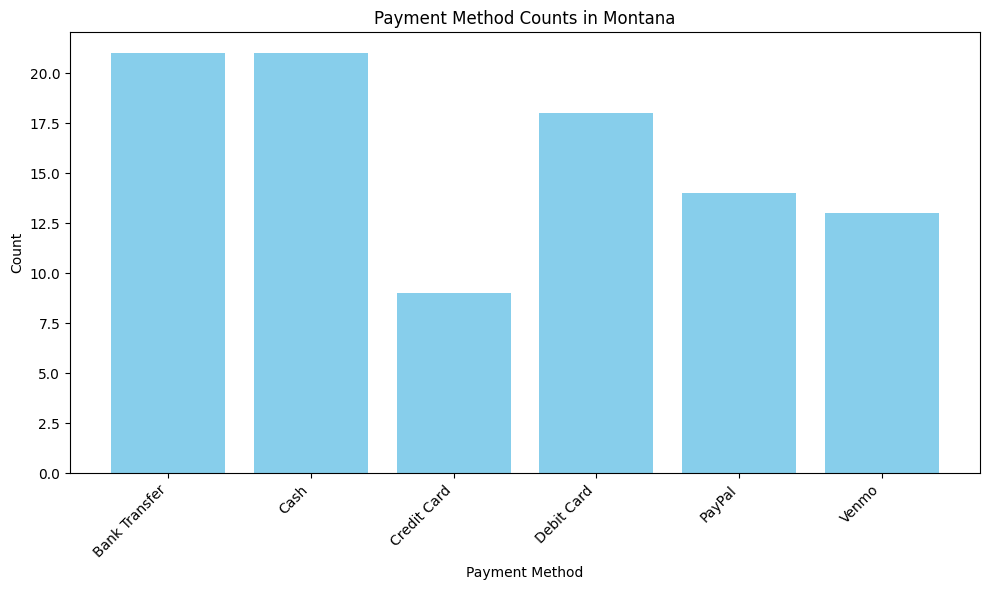

In [238]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame 'df' is already loaded

# Filter the DataFrame for data related to Montana
montana_data = df[df['Location'] == 'Montana']

# Group by 'Payment Method' and count occurrences
payment_grouped1 = montana_data.groupby('Payment Method').size().reset_index(name='Count')

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(payment_grouped1['Payment Method'], payment_grouped1['Count'], color='skyblue')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Payment Method Counts in Montana')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [90]:
payment_grouped1

,Location,Payment Method,Count
0,Alabama,Bank Transfer,10
1,Alabama,Cash,8
2,Alabama,Credit Card,17
3,Alabama,Debit Card,20
4,Alabama,PayPal,19
...,...,...,...
295,Wyoming,Cash,10
296,Wyoming,Credit Card,17
297,Wyoming,Debit Card,20
298,Wyoming,PayPal,6


To draw correaltions betweeen gender and item purchased

In [244]:
df = pd.read_csv('customer_details.csv')

In [245]:
gender_group = df.groupby(['Gender', 'Item Purchased']).size().reset_index(name='count')

To plot the the values of various products purchases in terms of gender

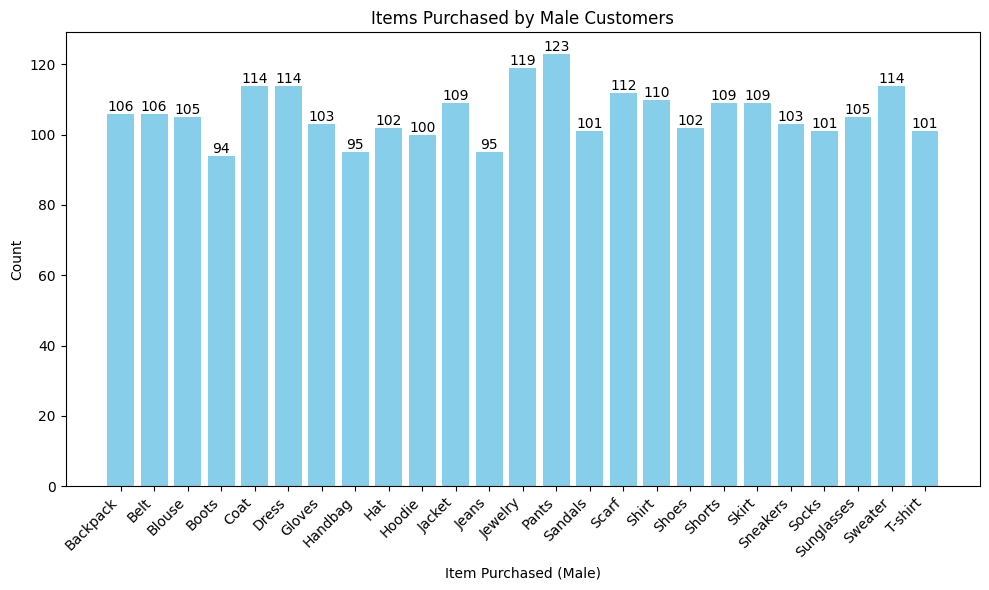

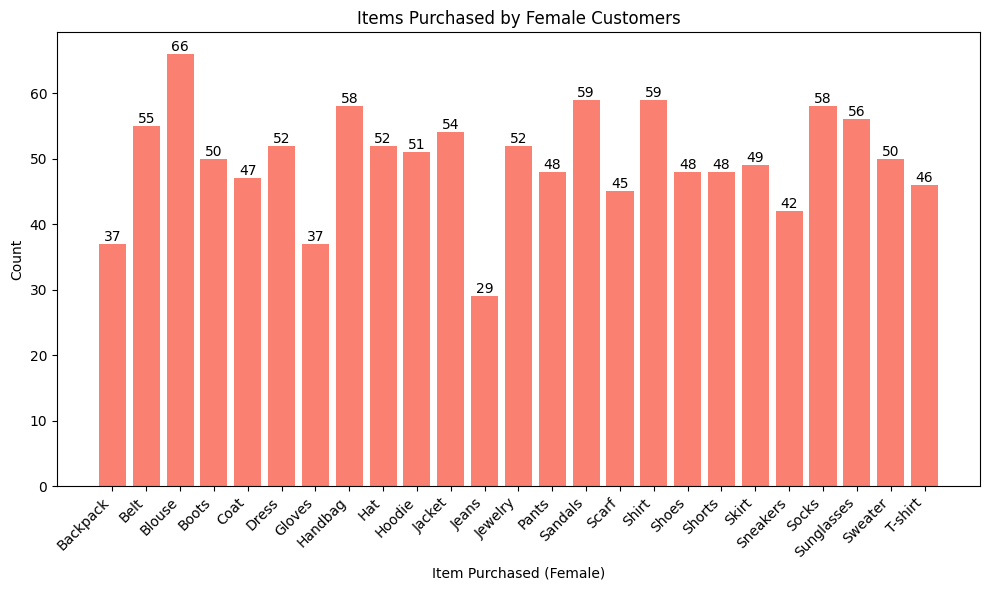

In [248]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame 'df' is already loaded

# Group by 'Gender' and 'Item Purchased', count occurrences, and reset index
gender_group = df.groupby(['Gender', 'Item Purchased']).size().reset_index(name='Count')

# Filter data for Male and Female separately
male_data = gender_group[gender_group['Gender'] == 'Male']
female_data = gender_group[gender_group['Gender'] == 'Female']

# Plotting bar chart for Male
plt.figure(figsize=(10, 6))
bars_male = plt.bar(male_data['Item Purchased'], male_data['Count'], color='skyblue')
plt.xlabel('Item Purchased (Male)')
plt.ylabel('Count')
plt.title('Items Purchased by Male Customers')
plt.xticks(rotation=45, ha='right')

# Annotate bars with counts for Male
for bar in bars_male:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), va='bottom', ha='center')

plt.tight_layout()
plt.show()

# Plotting bar chart for Female
plt.figure(figsize=(10, 6))
bars_female = plt.bar(female_data['Item Purchased'], female_data['Count'], color='salmon')
plt.xlabel('Item Purchased (Female)')
plt.ylabel('Count')
plt.title('Items Purchased by Female Customers')
plt.xticks(rotation=45, ha='right')

# Annotate bars with counts for Female
for bar in bars_female:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), va='bottom', ha='center')

plt.tight_layout()
plt.show()

To show the difference between the quantity and preference of the item purchased between male and female in the same plot

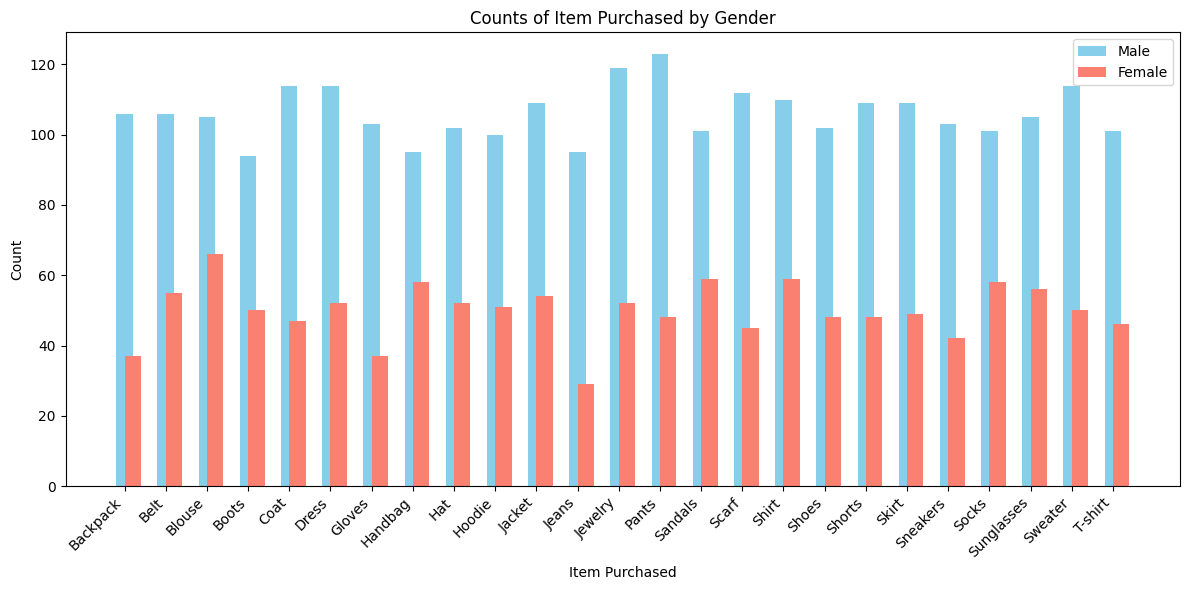

In [112]:
# Separate data for male and female
male_data = gender_group[gender_group['Gender'] == 'Male']
female_data = gender_group[gender_group['Gender'] == 'Female']

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Get unique 'Item Purchased' values for x-axis labels
x_labels = gender_group['Item Purchased'].unique()

# Plotting bars for male and female data
ax.bar(x_labels, male_data['count'], width=0.4, label='Male', align='center', color='skyblue')
ax.bar(x_labels, female_data['count'], width=0.4, label='Female', align='edge', color='salmon')

# Adding labels and title
ax.set_xlabel('Item Purchased')
ax.set_ylabel('Count')
ax.set_title('Counts of Item Purchased by Gender')
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

To plot the frequncy of purchases between male and female 

In [109]:
Freq_of_purchase_group = df.groupby(['Gender', 'Frequency of Purchases']).size().reset_index(name='count')

In [110]:
Freq_of_purchase_group

,Gender,Frequency of Purchases,count
0,Female,Annually,185
1,Female,Bi-Weekly,188
2,Female,Every 3 Months,186
3,Female,Fortnightly,163
4,Female,Monthly,185
5,Female,Quarterly,169
6,Female,Weekly,172
7,Male,Annually,387
8,Male,Bi-Weekly,359
9,Male,Every 3 Months,398


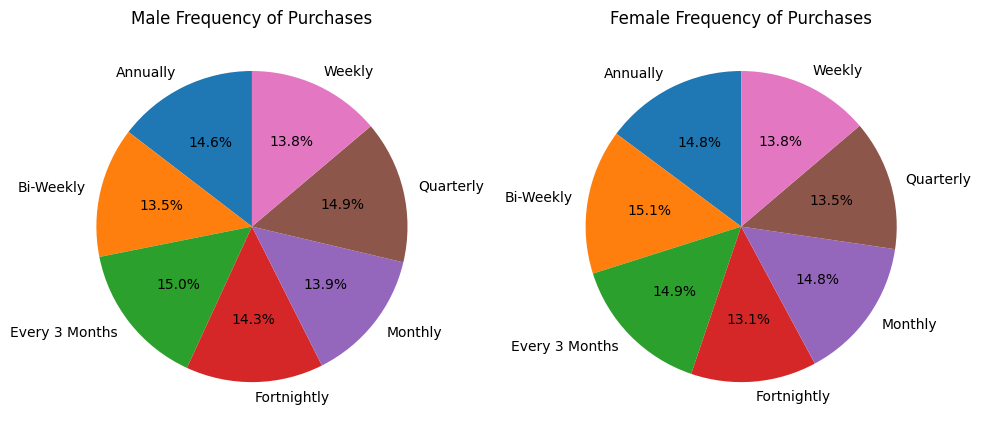

In [111]:
male_data = Freq_of_purchase_group[Freq_of_purchase_group['Gender'] == 'Male']
female_data = Freq_of_purchase_group[Freq_of_purchase_group['Gender'] == 'Female']

# Plotting pie charts for male and female groups
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Male Pie Chart
axs[0].pie(male_data['count'], labels=male_data['Frequency of Purchases'], autopct='%1.1f%%', startangle=90)
axs[0].set_title('Male Frequency of Purchases')

# Female Pie Chart
axs[1].pie(female_data['count'], labels=female_data['Frequency of Purchases'], autopct='%1.1f%%', startangle=90)
axs[1].set_title('Female Frequency of Purchases')

plt.tight_layout()
plt.show()

In [176]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.


To find the relationship between color and season

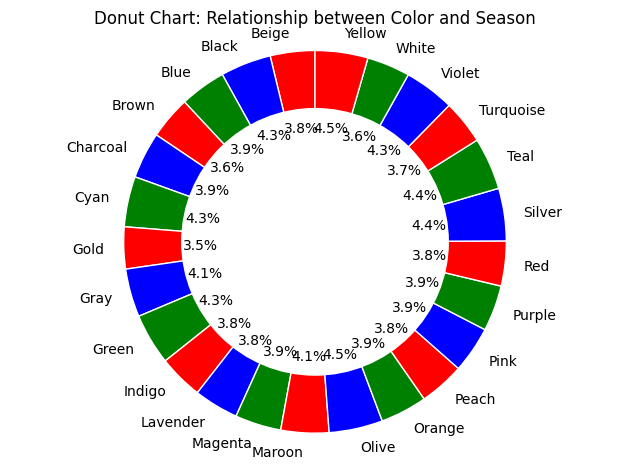

In [117]:
grouped4 = df.groupby(['Season', 'Color']).size().unstack()

# Plotting the donut chart
colors = ['red', 'blue', 'green']  # Specify colors for each 'Color'
fig, ax = plt.subplots()
ax.pie(grouped4.sum(), labels=grouped4.columns, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})

# Draw a circle at the center of pie to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Adding title
plt.title('Donut Chart: Relationship between Color and Season')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

In [159]:
pip install statsmodels



   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
    --------------------------------------- 0.1/9.8 MB 1.8 MB/s eta 0:00:06
   - -------------------------------------- 0.4/9.8 MB 4.5 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/9.8 MB 10.1 MB/s eta 0:00:01
   ----------- ---------------------------- 2.8/9.8 MB 14.9 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/9.8 MB 20.7 MB/s eta 0:00:01
   -------------------------- ------------- 6.4/9.8 MB 24.2 MB/s eta 0:00:01
   --------------------------------- ------ 8.2/9.8 MB 26.3 MB/s eta 0:00:01
   ---------------------------------------  9.8/9.8 MB 28.6 MB/s eta 0:00:01
   ---------------------------------------  9.8/9.8 MB 28.6 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 24.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/233.9 kB ? eta -:--:--
   -------------------

To find the insights of the subscrition stats , discount applied and promo code used in order to increase the sales

In [127]:
sub_grouped = df.groupby(['Subscription Status', 'Discount Applied', 'Promo Code Used']).size().reset_index(name='Count')
print(sub_grouped)


  Subscription Status Discount Applied Promo Code Used  Count
0                  No               No              No   2223
1                  No              Yes             Yes    624
2                 Yes              Yes             Yes   1053


Location based information on subscrition stats , dicount applied and promo code used

In [130]:
sub_grouped = df.groupby(['Subscription Status', 'Discount Applied', 'Promo Code Used', 'Location']).size()
print(sub_grouped)


Subscription Status  Discount Applied  Promo Code Used  Location     
No                   No                No               Alabama          53
                                                        Alaska           43
                                                        Arizona          43
                                                        Arkansas         42
                                                        California       55
                                                                         ..
Yes                  Yes               Yes              Virginia         24
                                                        Washington       21
                                                        West Virginia    28
                                                        Wisconsin        13
                                                        Wyoming          20
Length: 150, dtype: int64


In [131]:
sub_grouped_location = df.groupby(['Location', 'Subscription Status', 'Discount Applied', 'Promo Code Used']).size().reset_index(name='Count')
print(sub_grouped_location)


      Location Subscription Status Discount Applied Promo Code Used  Count
0      Alabama                  No               No              No     53
1      Alabama                  No              Yes             Yes     14
2      Alabama                 Yes              Yes             Yes     22
3       Alaska                  No               No              No     43
4       Alaska                  No              Yes             Yes     11
..         ...                 ...              ...             ...    ...
145  Wisconsin                  No              Yes             Yes     23
146  Wisconsin                 Yes              Yes             Yes     13
147    Wyoming                  No               No              No     41
148    Wyoming                  No              Yes             Yes     10
149    Wyoming                 Yes              Yes             Yes     20

[150 rows x 5 columns]


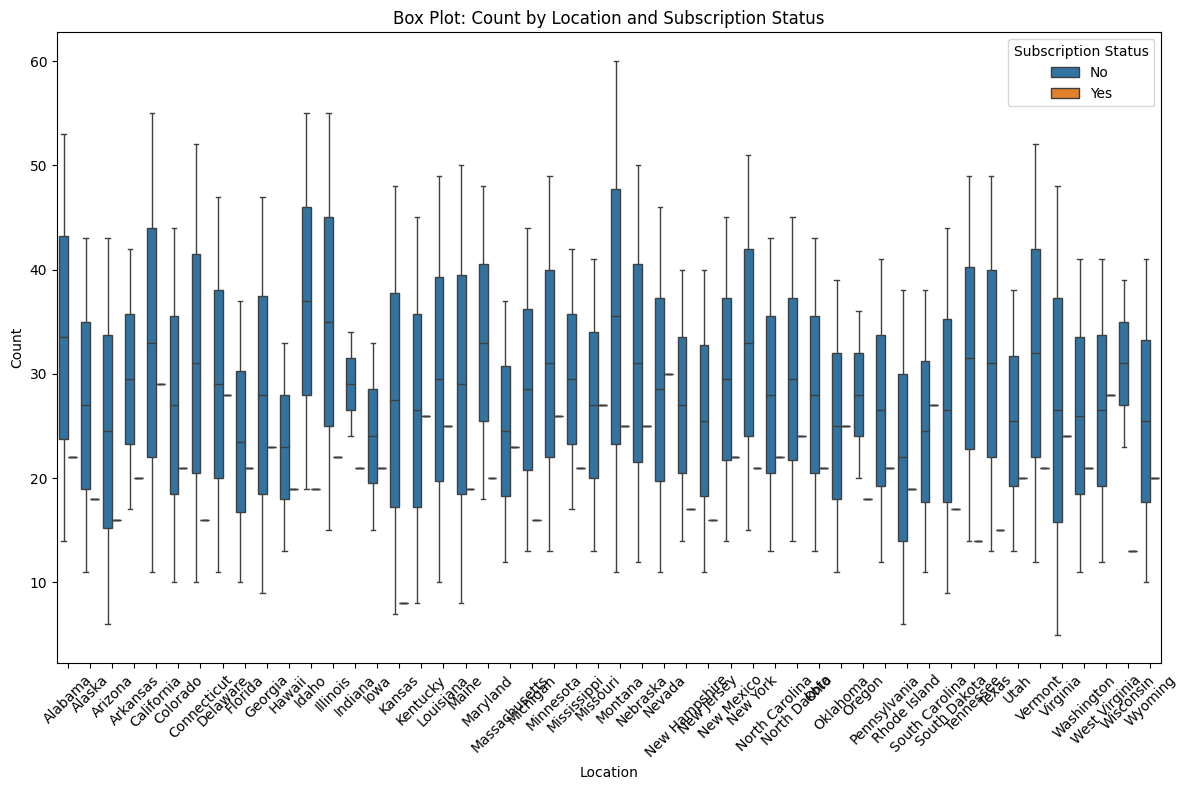

In [132]:

# Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Location', y='Count', hue='Subscription Status', data=sub_grouped_location)
plt.title('Box Plot: Count by Location and Subscription Status')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Subscription Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


To vizualize the trend of the location and subscrition status

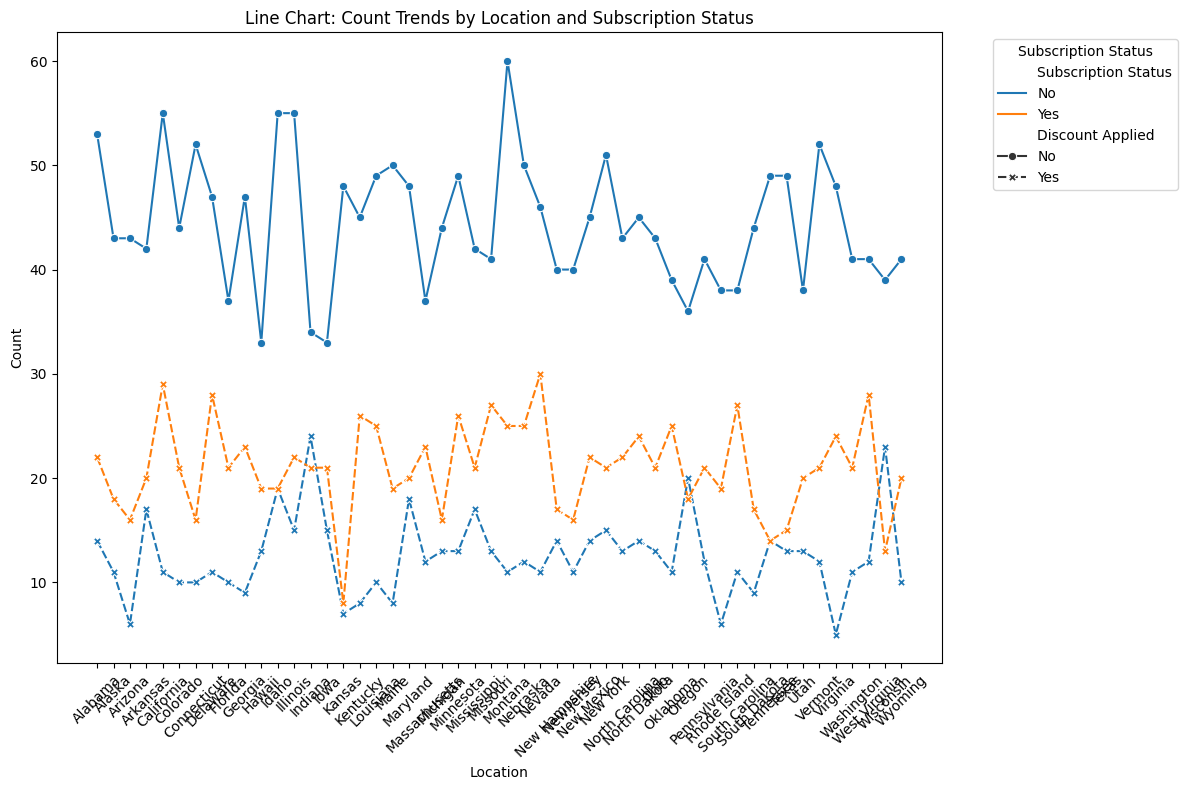

In [133]:

# Line Chart
plt.figure(figsize=(12, 8))
sns.lineplot(x='Location', y='Count', hue='Subscription Status', style='Discount Applied', markers=True, data=sub_grouped_location)
plt.title('Line Chart: Count Trends by Location and Subscription Status')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Subscription Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [134]:
review_rating = df.groupby(['Gender', 'Review Rating', 'Frequency of Purchases']).size().reset_index(name='Count')
print(review_rating)


     Gender  Review Rating Frequency of Purchases  Count
0    Female            2.5               Annually      3
1    Female            2.5              Bi-Weekly      5
2    Female            2.5         Every 3 Months      1
3    Female            2.5            Fortnightly      4
4    Female            2.5                Monthly      3
..      ...            ...                    ...    ...
359    Male            5.0         Every 3 Months      8
360    Male            5.0            Fortnightly      3
361    Male            5.0                Monthly      8
362    Male            5.0              Quarterly     11
363    Male            5.0                 Weekly      4

[364 rows x 4 columns]


In [135]:
min_rating = df['Review Rating'].min()
max_rating = df['Review Rating'].max()

print(f"The range of review ratings is from {min_rating} to {max_rating}")


The range of review ratings is from 2.5 to 5.0


To find the count of each rating rate 


In [137]:
bins = [2.5, 3, 3.5, 4, 4.5, 5]
labels = ['2.5-3', '3-3.5', '3.5-4', '4-4.5', '4.5-5']

# Apply binning to 'Review Rating' and create a new column 'Rating Range'
df['Rating Range'] = pd.cut(df['Review Rating'], bins=bins, labels=labels, include_lowest=True)

# Group by 'Gender', 'Rating Range', and 'Frequency of Purchases' and count occurrences
review_rating = df.groupby(['Review Rating']).size().reset_index(name='Count')

print(review_rating)

    Review Rating  Count
0             2.5     66
1             2.6    159
2             2.7    154
3             2.8    136
4             2.9    170
5             3.0    162
6             3.1    157
7             3.2    152
8             3.3    152
9             3.4    182
10            3.5    156
11            3.6    149
12            3.7    156
13            3.8    142
14            3.9    163
15            4.0    181
16            4.1    148
17            4.2    171
18            4.3    147
19            4.4    158
20            4.5    139
21            4.6    174
22            4.7    148
23            4.8    144
24            4.9    166
25            5.0     68


To find the count of frequncy of purchases grouping by gender , rating range 

In [138]:
bins = [2.5, 3, 3.5, 4, 4.5, 5]
labels = ['2.5-3', '3-3.5', '3.5-4', '4-4.5', '4.5-5']

# Apply binning to 'Review Rating' and create a new column 'Rating Range'
df['Rating Range'] = pd.cut(df['Review Rating'], bins=bins, labels=labels, include_lowest=True)

# Group by 'Gender', 'Rating Range', and 'Frequency of Purchases' and count occurrences
review_rating1 = df.groupby(['Gender', 'Rating Range', 'Frequency of Purchases']).size().reset_index(name='Count')

print(review_rating1)

    Gender Rating Range Frequency of Purchases  Count
0   Female        2.5-3               Annually     33
1   Female        2.5-3              Bi-Weekly     45
2   Female        2.5-3         Every 3 Months     43
3   Female        2.5-3            Fortnightly     36
4   Female        2.5-3                Monthly     40
..     ...          ...                    ...    ...
65    Male        4.5-5         Every 3 Months     72
66    Male        4.5-5            Fortnightly     74
67    Male        4.5-5                Monthly     77
68    Male        4.5-5              Quarterly     76
69    Male        4.5-5                 Weekly     62

[70 rows x 4 columns]


C:\Users\aksha\AppData\Local\Temp\ipykernel_2780\3621701231.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  review_rating1 = df.groupby(['Gender', 'Rating Range', 'Frequency of Purchases']).size().reset_index(name='Count')


to depict the count of frequncy of purchases based on the different bins of rating 

In [148]:
male_table = review_rating1[review_rating1['Gender'] == 'Male']
female_table = review_rating1[review_rating1['Gender'] == 'Female']

print("Table for Males:")
print(male_table)
print("\nTable for Females:")
print(female_table)

Table for Males:
   Gender Rating Range Frequency of Purchases  Count
35   Male        2.5-3               Annually     83
36   Male        2.5-3              Bi-Weekly     86
37   Male        2.5-3         Every 3 Months     79
38   Male        2.5-3            Fortnightly     80
39   Male        2.5-3                Monthly     79
40   Male        2.5-3              Quarterly     94
41   Male        2.5-3                 Weekly     72
42   Male        3-3.5               Annually     77
43   Male        3-3.5              Bi-Weekly     81
44   Male        3-3.5         Every 3 Months     75
45   Male        3-3.5            Fortnightly     83
46   Male        3-3.5                Monthly     64
47   Male        3-3.5              Quarterly     89
48   Male        3-3.5                 Weekly     66
49   Male        3.5-4               Annually     87
50   Male        3.5-4              Bi-Weekly     68
51   Male        3.5-4         Every 3 Months     84
52   Male        3.5-4       

In [143]:
!pip install squarify
import squarify


Deptict the realtionsship between frequency of purchases and the rating rate in terms of gender

C:\Users\aksha\AppData\Local\Temp\ipykernel_2780\883137987.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = male_table.pivot_table(index='Rating Range', columns='Frequency of Purchases', values='Count', fill_value=0)


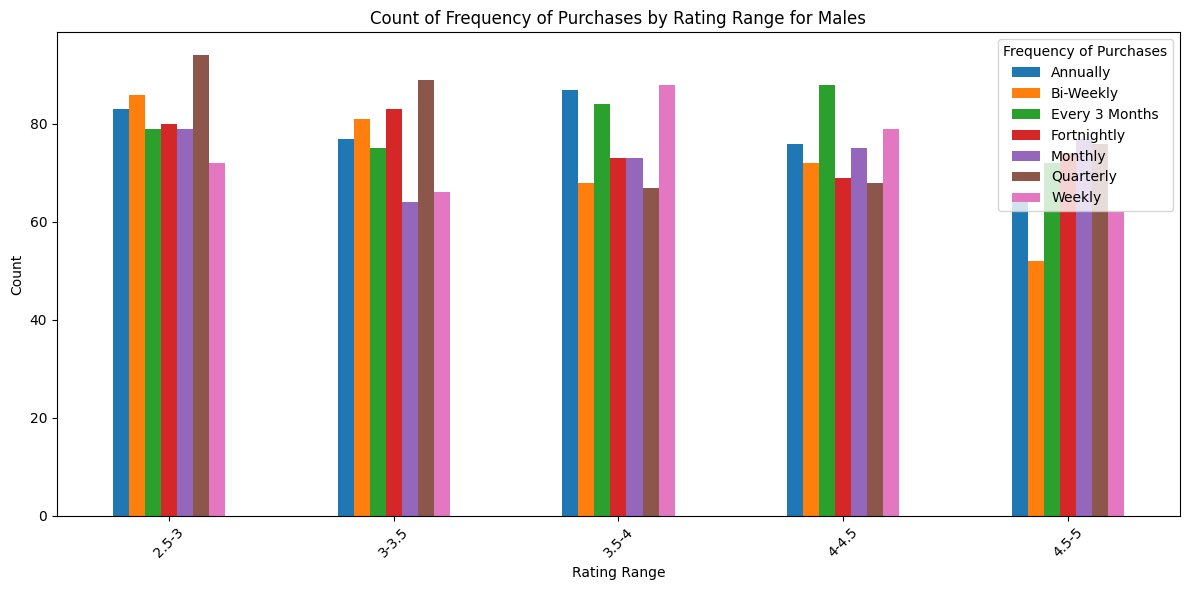

In [151]:
pivot_df = male_table.pivot_table(index='Rating Range', columns='Frequency of Purchases', values='Count', fill_value=0)

# Plotting the bar chart
pivot_df.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Rating Range')
plt.ylabel('Count')
plt.title('Count of Frequency of Purchases by Rating Range for Males')
plt.xticks(rotation=45)
plt.legend(title='Frequency of Purchases')

plt.tight_layout()
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_2780\272179016.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df1 = female_table.pivot_table(index='Rating Range', columns='Frequency of Purchases', values='Count', fill_value=0)


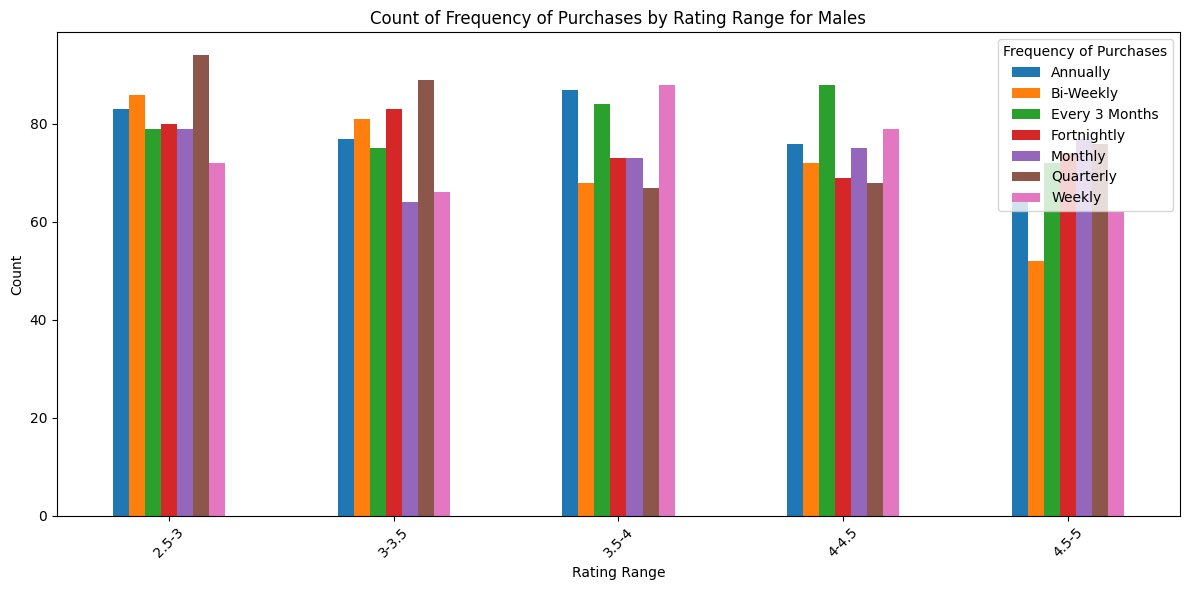

In [153]:
pivot_df1 = female_table.pivot_table(index='Rating Range', columns='Frequency of Purchases', values='Count', fill_value=0)

# Plotting the bar chart
pivot_df.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Rating Range')
plt.ylabel('Count')
plt.title('Count of Frequency of Purchases by Rating Range for Males')
plt.xticks(rotation=45)
plt.legend(title='Frequency of Purchases')

plt.tight_layout()
plt.show()

to depict and visualize the relationship between shipping type and the rating rate levels 

In [154]:
df['Rating Range'] = pd.cut(df['Review Rating'], bins=bins, labels=labels, include_lowest=True)

# Group by 'Rating Range' and 'Shipping Type', then count occurrences
grouped_shipping = df.groupby(['Rating Range', 'Shipping Type']).size().reset_index(name='Count')

print(grouped_shipping)

   Rating Range   Shipping Type  Count
0         2.5-3  2-Day Shipping    125
1         2.5-3         Express    133
2         2.5-3   Free Shipping    143
3         2.5-3    Next Day Air    151
4         2.5-3        Standard    128
5         2.5-3    Store Pickup    167
6         3-3.5  2-Day Shipping    135
7         3-3.5         Express    118
8         3-3.5   Free Shipping    160
9         3-3.5    Next Day Air    141
10        3-3.5        Standard    122
11        3-3.5    Store Pickup    123
12        3.5-4  2-Day Shipping    139
13        3.5-4         Express    147
14        3.5-4   Free Shipping    129
15        3.5-4    Next Day Air    119
16        3.5-4        Standard    132
17        3.5-4    Store Pickup    125
18        4-4.5  2-Day Shipping    118
19        4-4.5         Express    128
20        4-4.5   Free Shipping    123
21        4-4.5    Next Day Air    124
22        4-4.5        Standard    145
23        4-4.5    Store Pickup    125
24        4.5-5  2-Day Sh

C:\Users\aksha\AppData\Local\Temp\ipykernel_2780\470815701.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_shipping = df.groupby(['Rating Range', 'Shipping Type']).size().reset_index(name='Count')


C:\Users\aksha\AppData\Local\Temp\ipykernel_2780\3783434676.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_shipping = df.groupby(['Rating Range', 'Shipping Type']).size().unstack(fill_value=0)


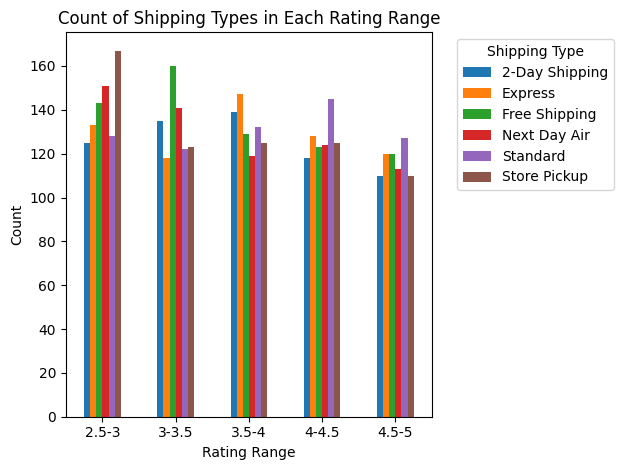

In [155]:
df['Rating Range'] = pd.cut(df['Review Rating'], bins=bins, labels=labels, include_lowest=True)

# Group by 'Rating Range' and 'Shipping Type', then count occurrences
grouped_shipping = df.groupby(['Rating Range', 'Shipping Type']).size().unstack(fill_value=0)

# Plotting the column chart
ax = grouped_shipping.plot(kind='bar', stacked=False)
plt.xlabel('Rating Range')
plt.ylabel('Count')
plt.title('Count of Shipping Types in Each Rating Range')
plt.legend(title='Shipping Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()